In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/healthcare_dataset.csv')

In [3]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


##Unique Features


In [9]:
df.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


## Date Analysis


In [10]:
df['Date of Admission'].value_counts().sort_values(ascending=False).nlargest(16)

,count
Date of Admission,
2024-03-16,50
2020-10-22,49
2022-07-24,49
2021-12-28,48
2021-01-03,48
2020-04-03,48
2020-06-07,47
2023-08-10,47
2022-01-09,47


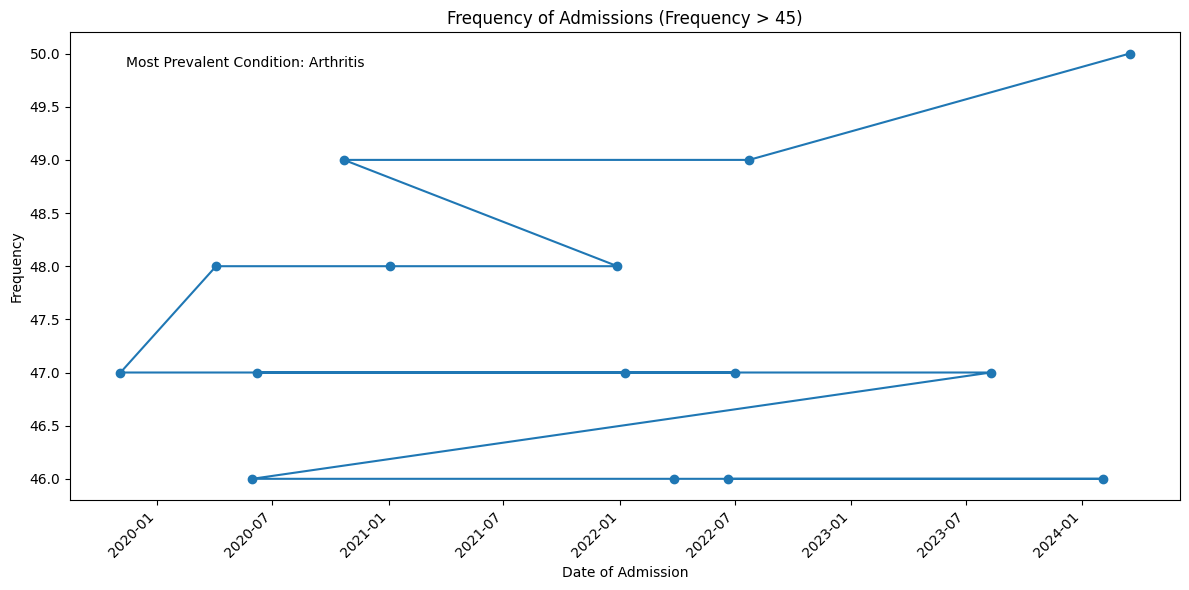

In [55]:
# prompt: Generate a line chart for the above cell with the frequency beng above 45 with the y axis showing date in ascending order and also show the most prevelant medical condition

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous cell
# If not, load your data here:
# df = pd.read_csv('/content/healthcare_dataset.csv')

# Convert 'Date of Admission' to datetime objects if it's not already
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Filter for frequencies above 45
date_counts = df['Date of Admission'].value_counts()
filtered_dates = date_counts[date_counts > 45]

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(filtered_dates.index, filtered_dates.values, marker='o')
plt.xlabel('Date of Admission')
plt.ylabel('Frequency')
plt.title('Frequency of Admissions (Frequency > 45)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the most prevalent medical condition
most_prevalent_condition = df['Medical Condition'].mode()[0]
plt.text(0.05, 0.95, f"Most Prevalent Condition: {most_prevalent_condition}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


## Hospital Analysis

In [19]:
df['Hospital'].value_counts().sort_values(ascending=False)

,count
Hospital,
LLC Smith,44
Ltd Smith,39
Johnson PLC,38
Smith Ltd,37
Smith PLC,36
...,...
Schmitt-Watts,1
Burton-Moore,1
"and Morgan, Holmes Hamilton",1


## Doctor Analysis


In [20]:
df['Doctor'].value_counts().sort_values(ascending=False)

,count
Doctor,
Michael Smith,27
Robert Smith,22
John Smith,22
Michael Johnson,20
James Smith,20
...,...
Amy Oconnor,1
Angelica Diaz,1
Melissa Vasquez,1


In [36]:
doc_counts = df['Doctor'].value_counts()
for doctor, count in doc_counts.items():
  if count >= 20:
    doctor_df = df.loc[df['Doctor'] == doctor]

    print(f"Analysis for Doctor: {doctor}")
    print(doctor_df['Medical Condition'].value_counts())
    print("-" * 20)



Analysis for Doctor: Michael Smith
Medical Condition
Hypertension    7
Diabetes        6
Cancer          5
Arthritis       4
Asthma          4
Obesity         1
Name: count, dtype: int64
--------------------
Analysis for Doctor: Robert Smith
Medical Condition
Obesity         5
Asthma          5
Cancer          4
Diabetes        3
Arthritis       3
Hypertension    2
Name: count, dtype: int64
--------------------
Analysis for Doctor: John Smith
Medical Condition
Arthritis       8
Obesity         5
Hypertension    4
Cancer          2
Asthma          2
Diabetes        1
Name: count, dtype: int64
--------------------
Analysis for Doctor: Michael Johnson
Medical Condition
Cancer          6
Asthma          4
Arthritis       3
Diabetes        3
Hypertension    2
Obesity         2
Name: count, dtype: int64
--------------------
Analysis for Doctor: James Smith
Medical Condition
Hypertension    5
Obesity         4
Diabetes        4
Asthma          3
Arthritis       2
Cancer          2
Name: count

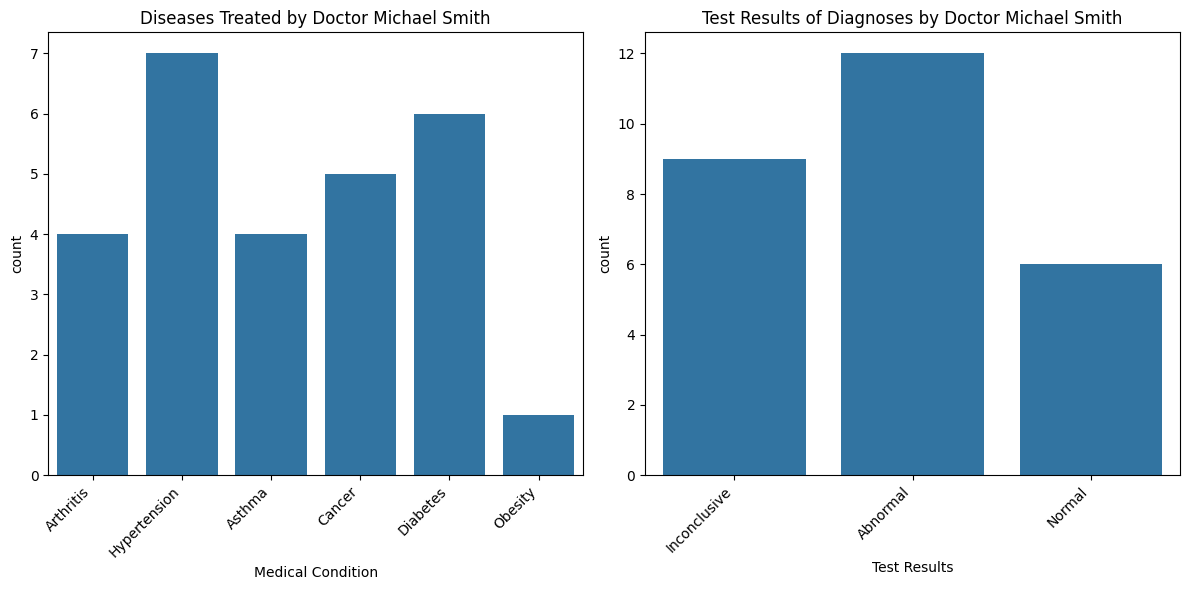

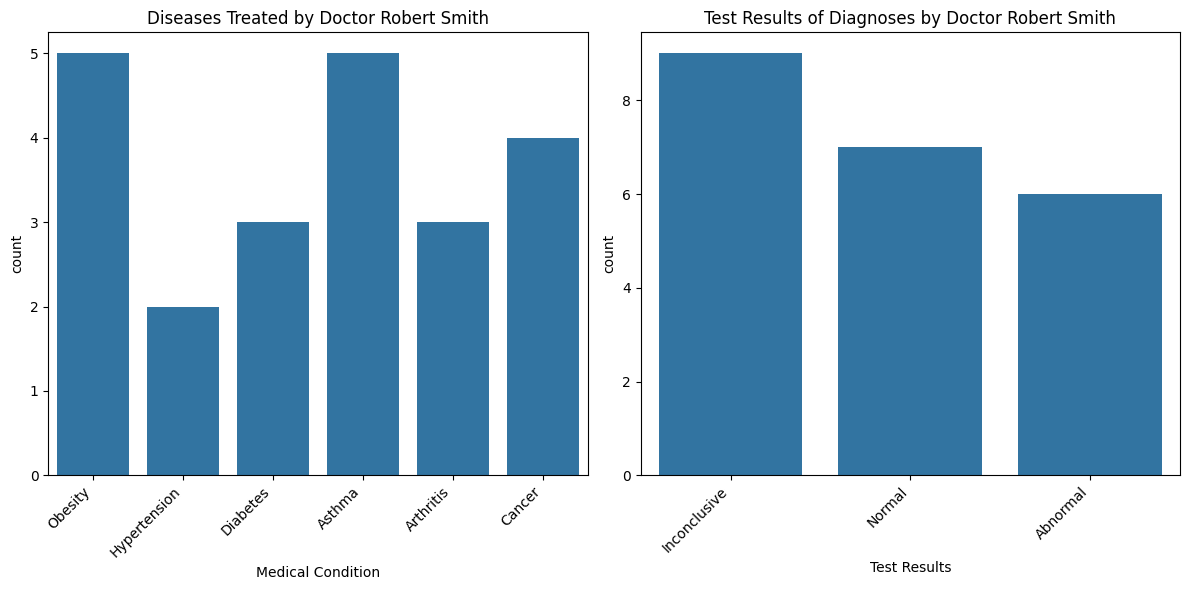

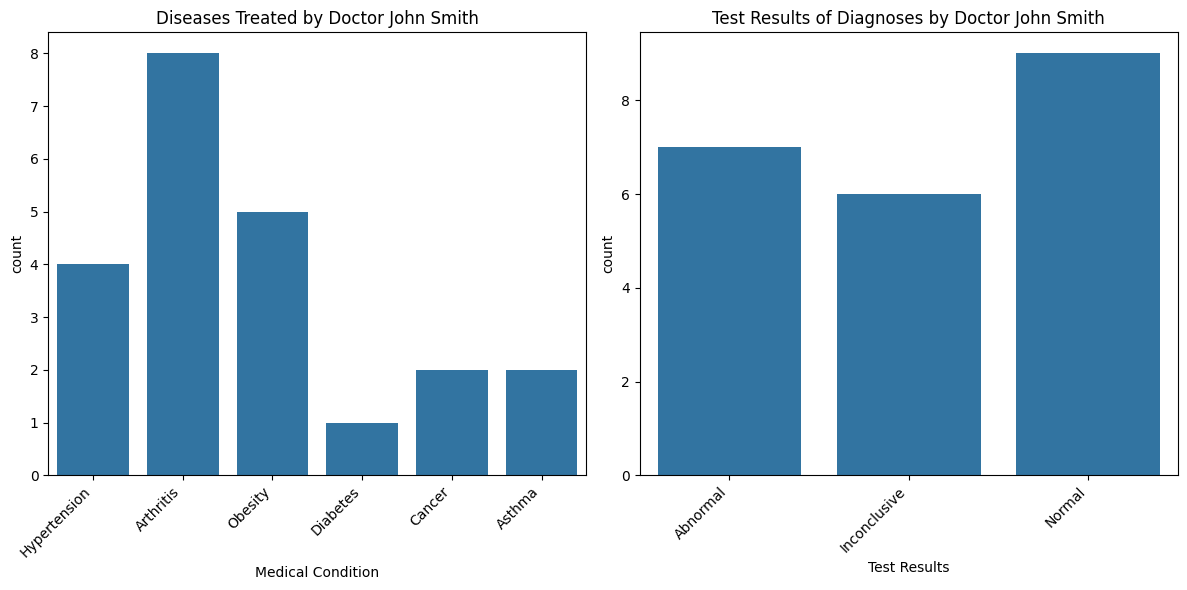

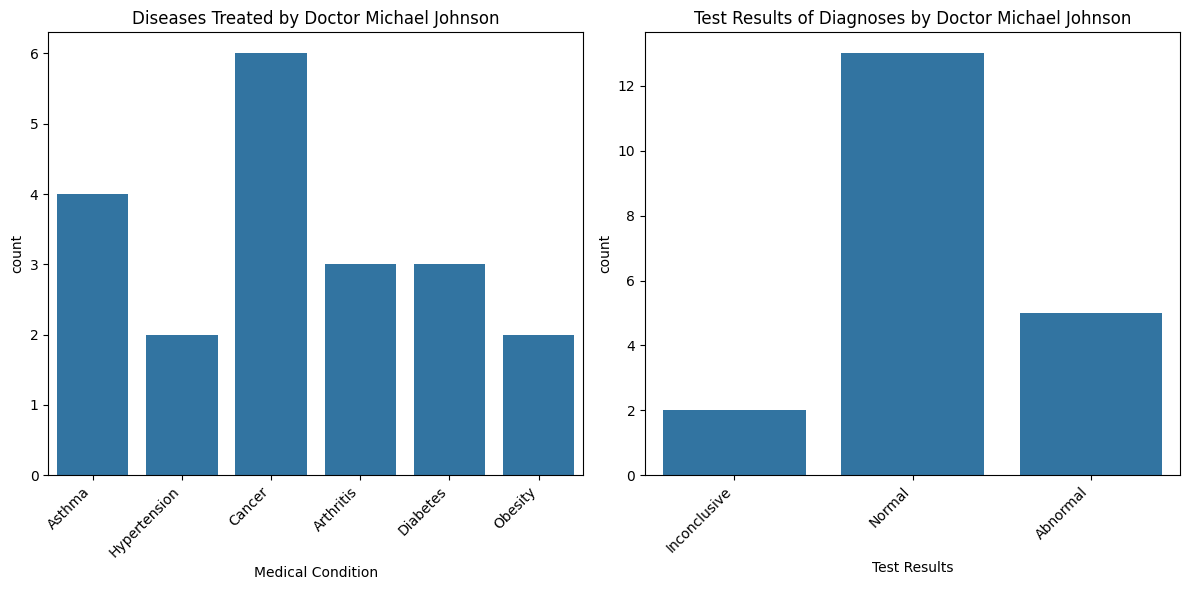

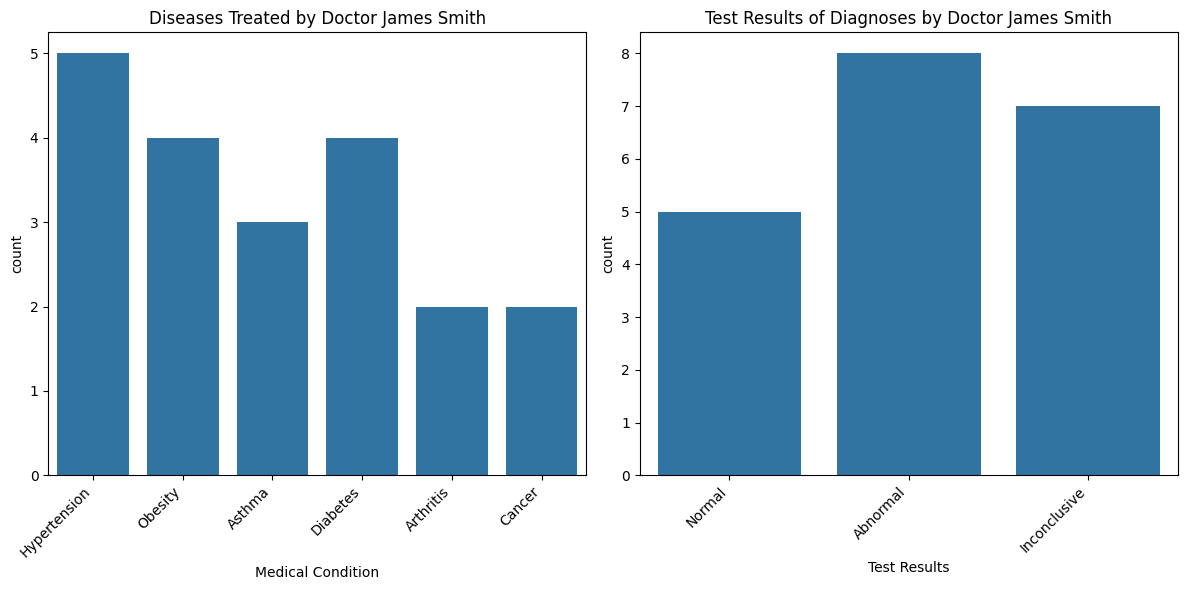

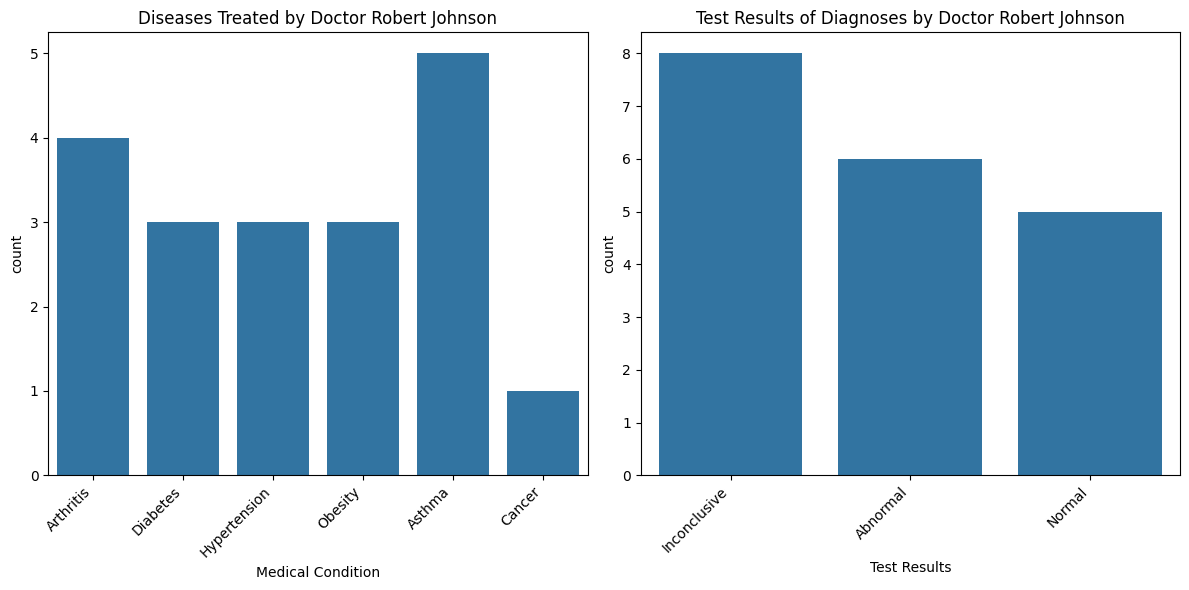

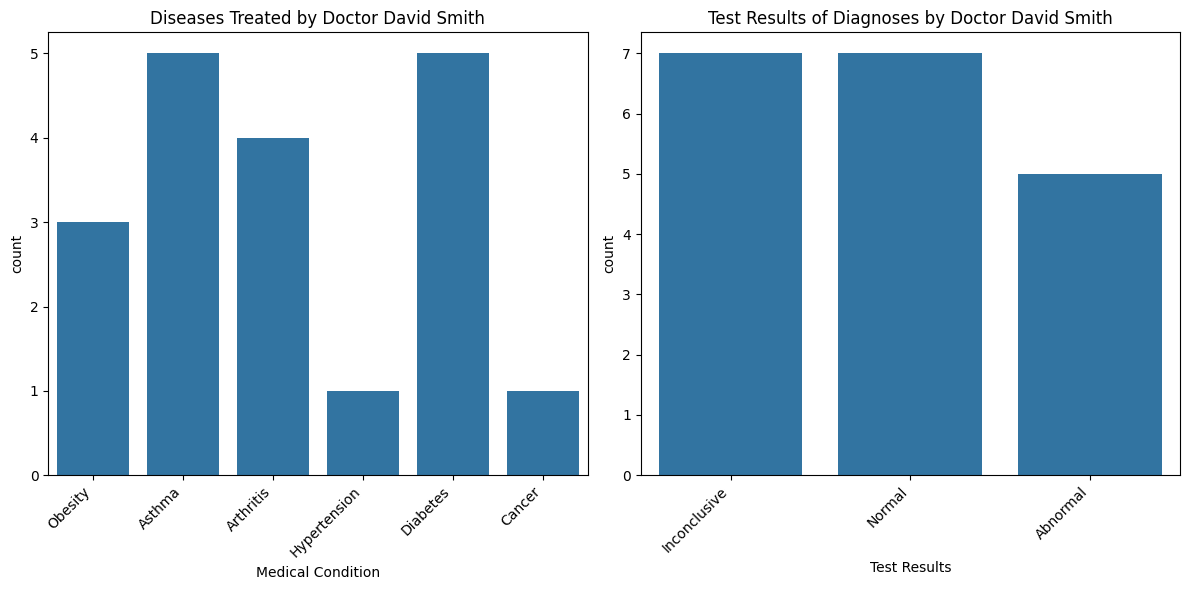

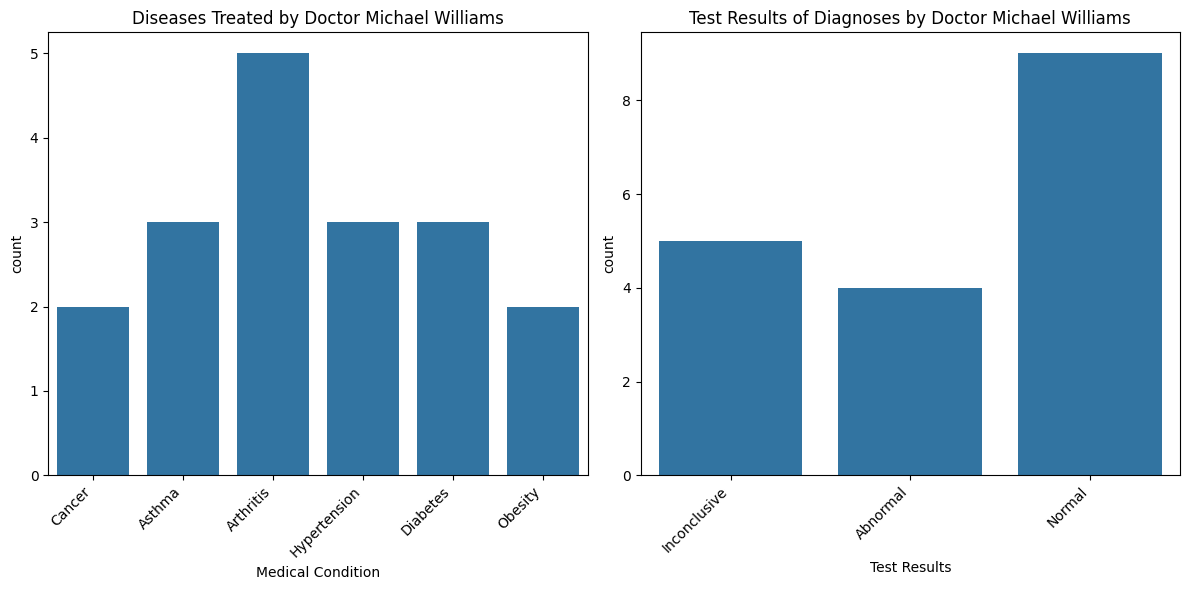

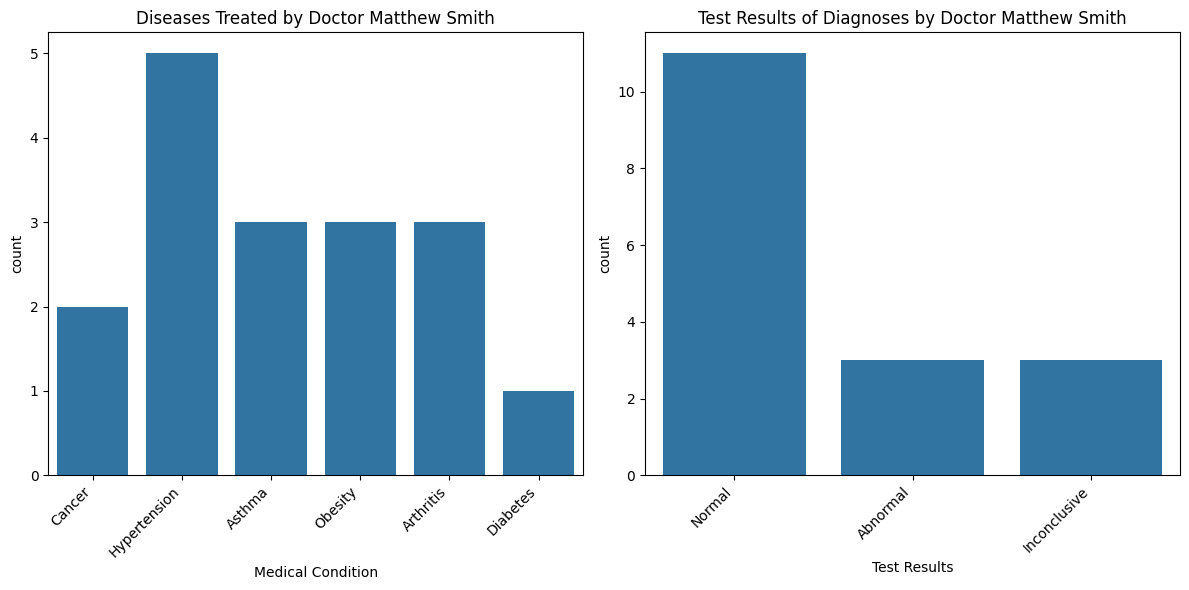

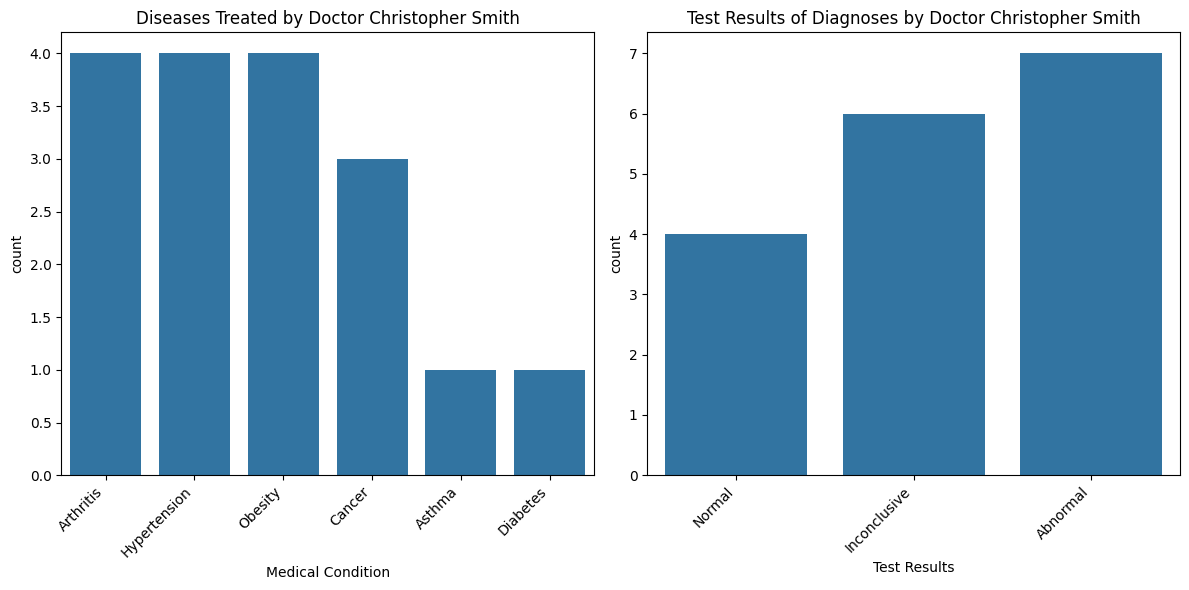

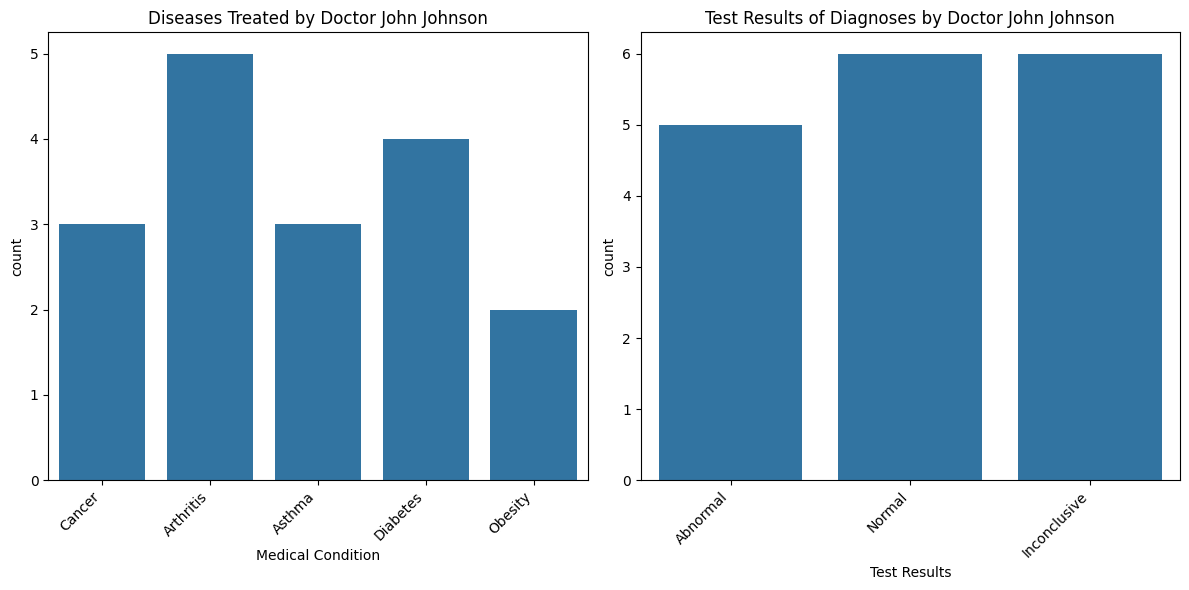

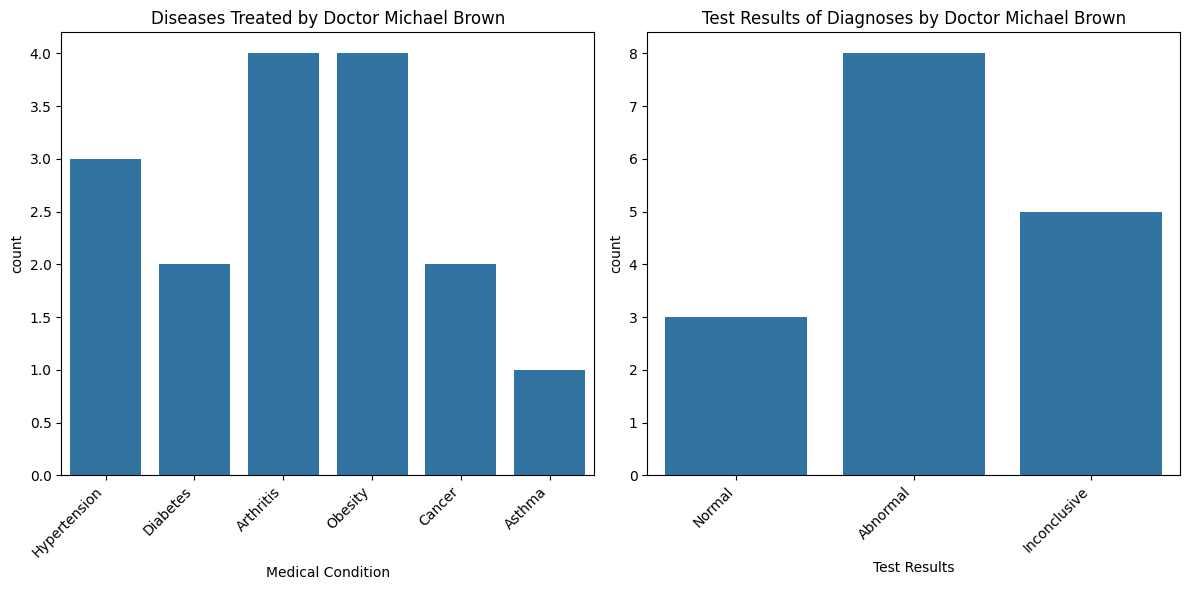

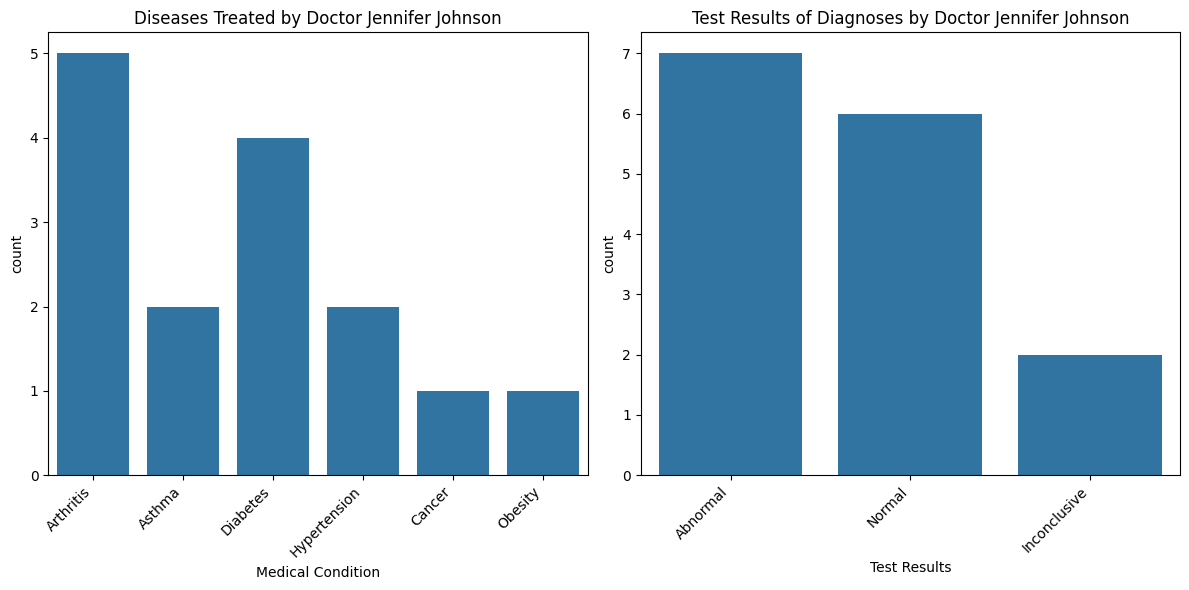

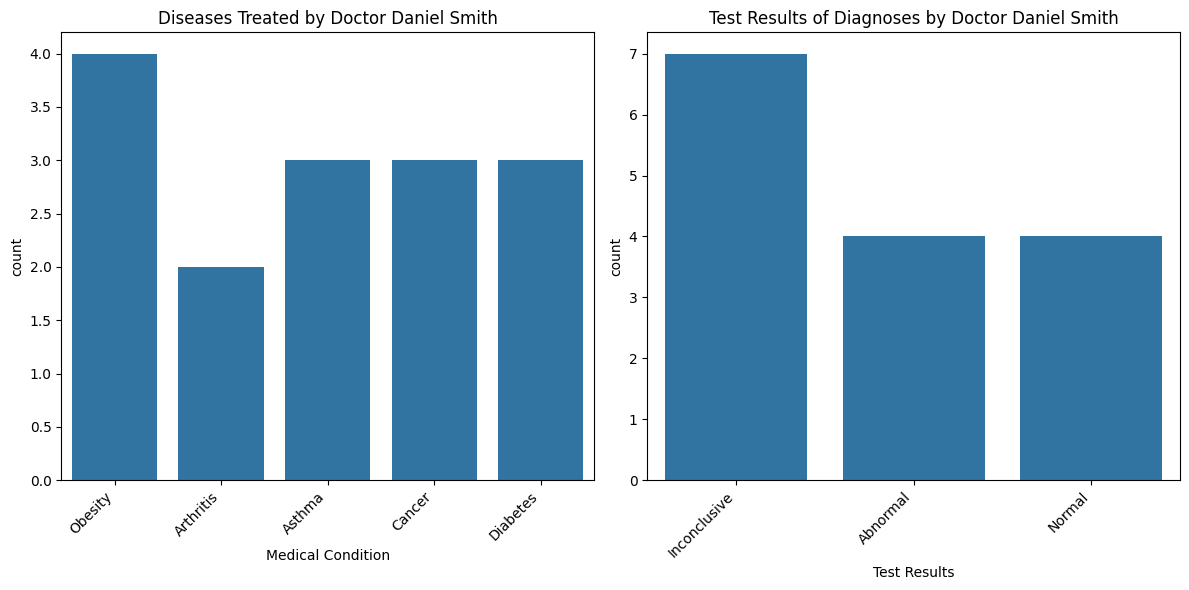

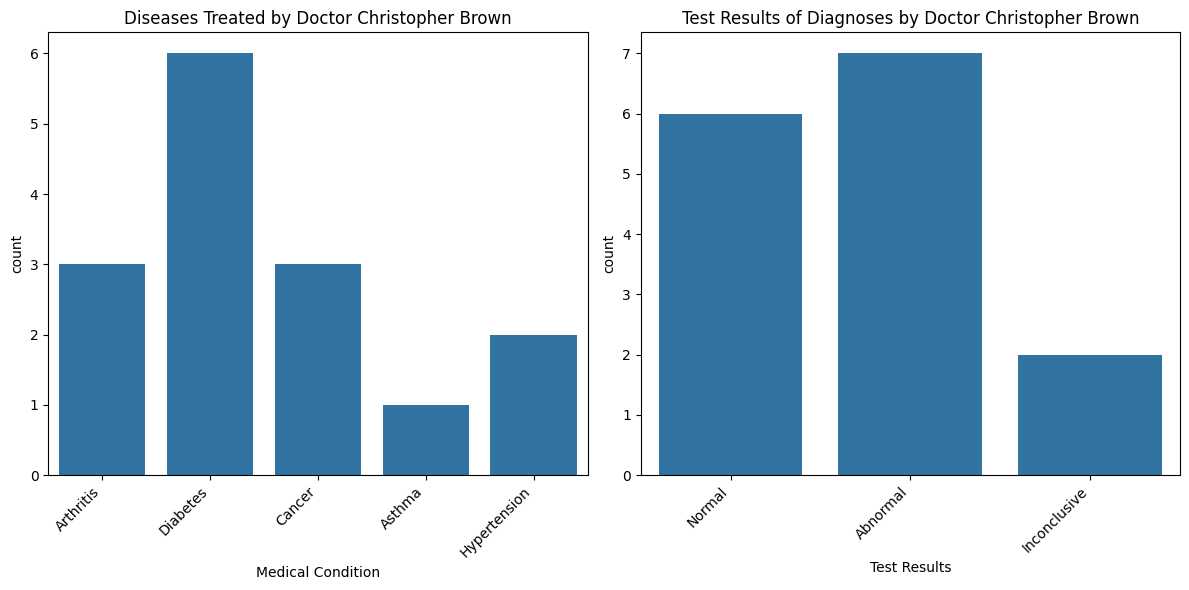

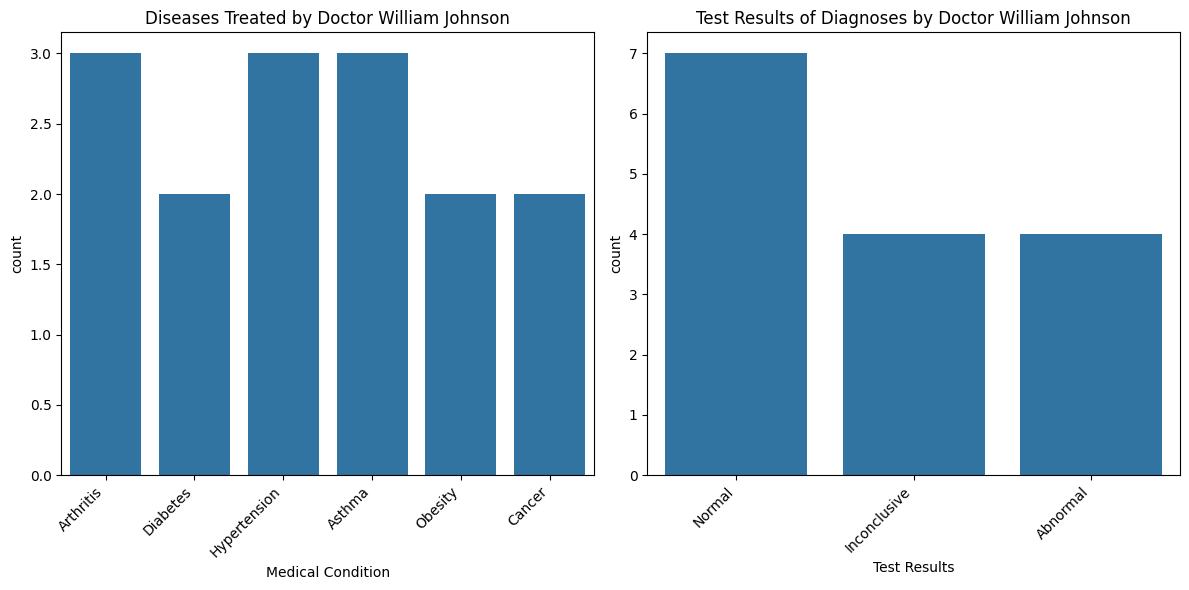

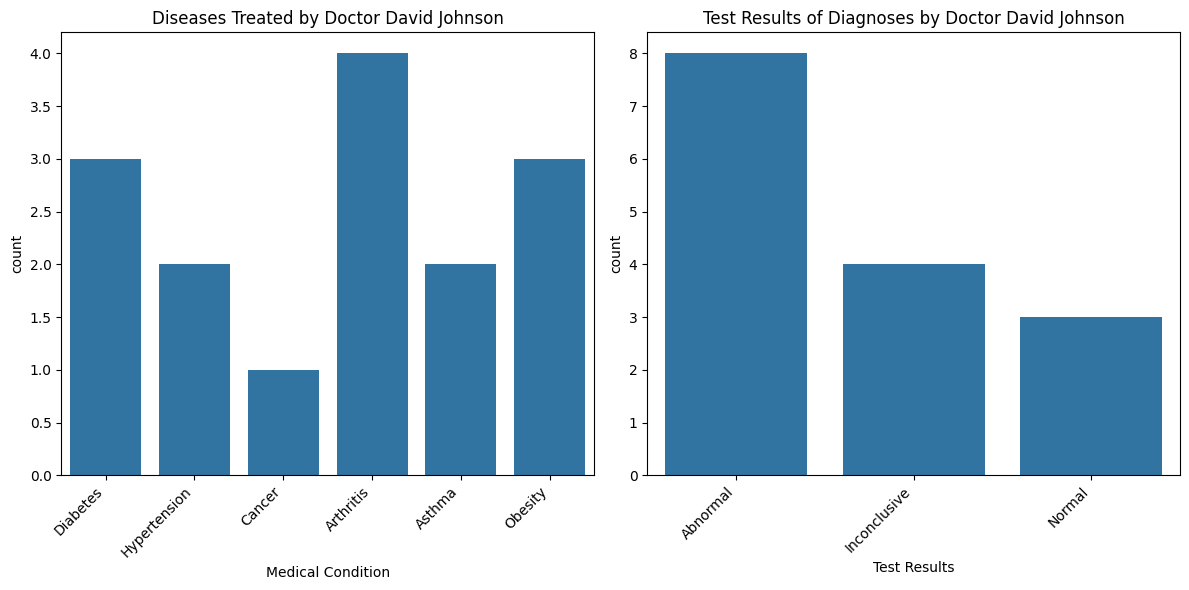

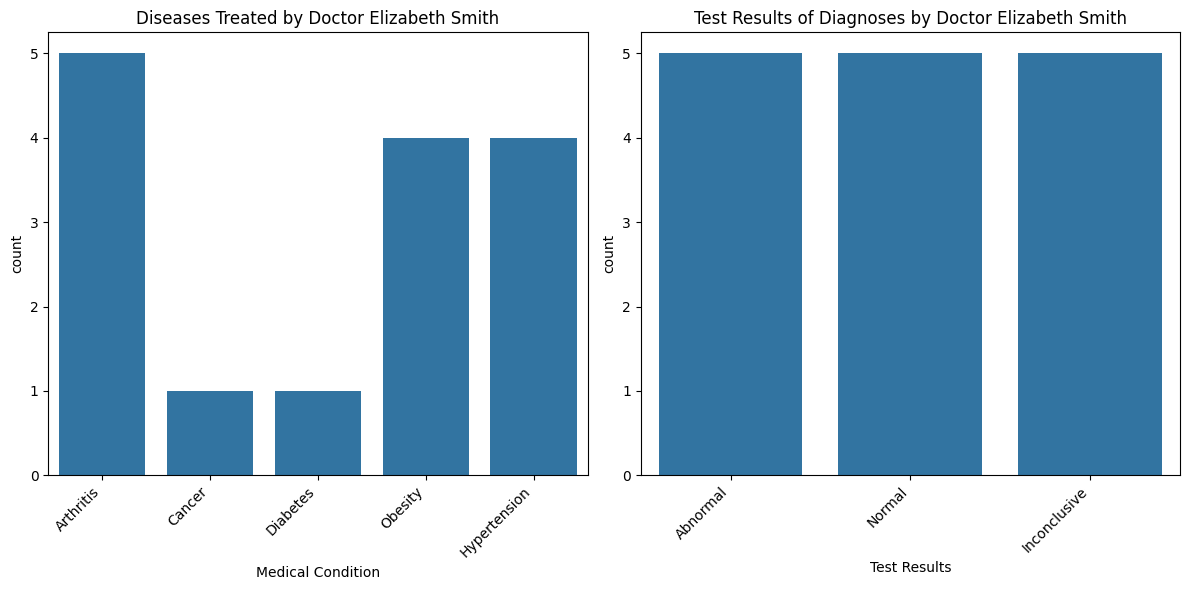

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

doc_counts = df['Doctor'].value_counts()
for doctor, count in doc_counts.items():
    if count >= 15:
        doctor_df = df.loc[df['Doctor'] == doctor]

        plt.figure(figsize=(12, 6))

        # Disease distribution plot
        plt.subplot(1, 2, 1)
        sns.countplot(x='Medical Condition', data=doctor_df)
        plt.title(f'Diseases Treated by Doctor {doctor}')
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        if 'Test Results' in doctor_df.columns:
            sns.countplot(x='Test Results', data=doctor_df)
            plt.title(f'Test Results of Diagnoses by Doctor {doctor}')
            plt.xticks(rotation=45, ha='right')
        else:
            plt.text(0.5, 0.5, 'No "Test Results" column found', ha='center', va='center')
            plt.title(f'No Test Result Data for Doctor {doctor}')

        plt.tight_layout()
        plt.show()


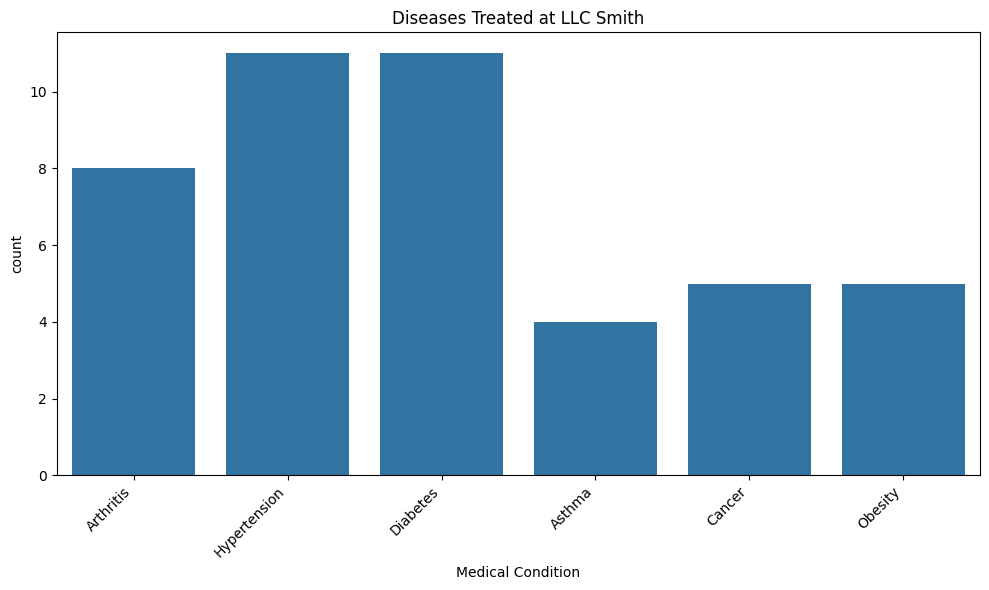

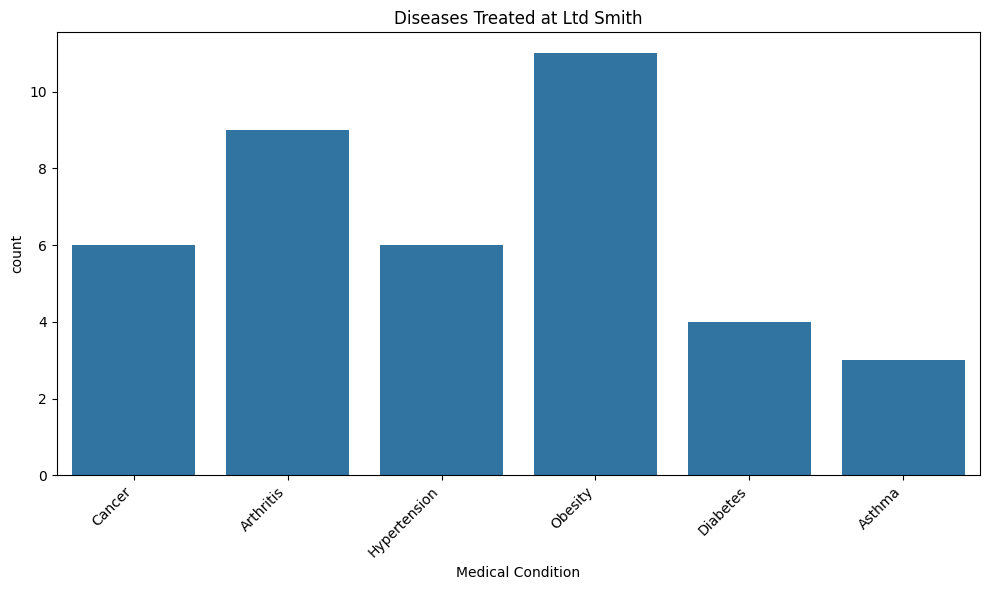

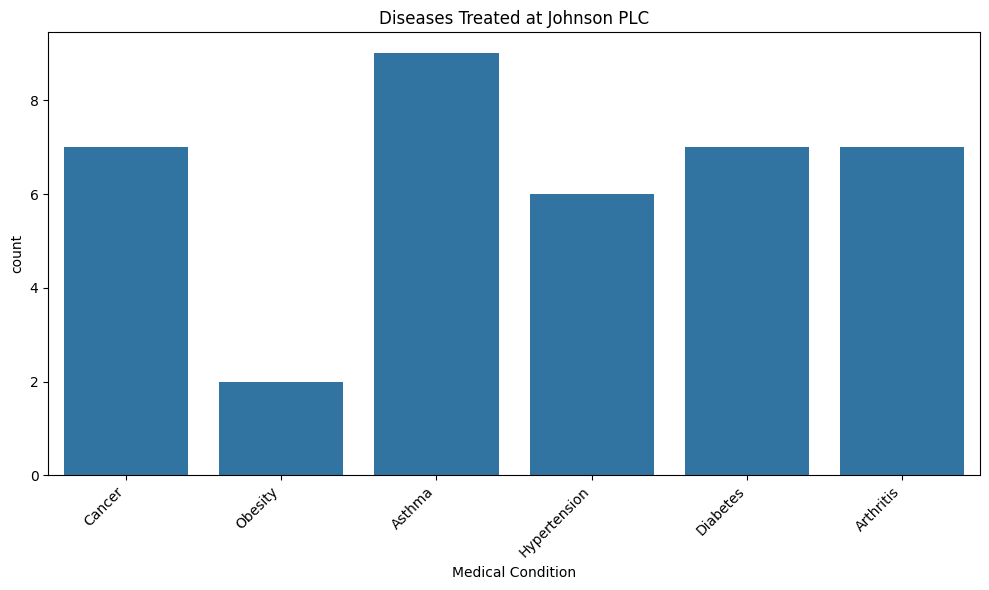

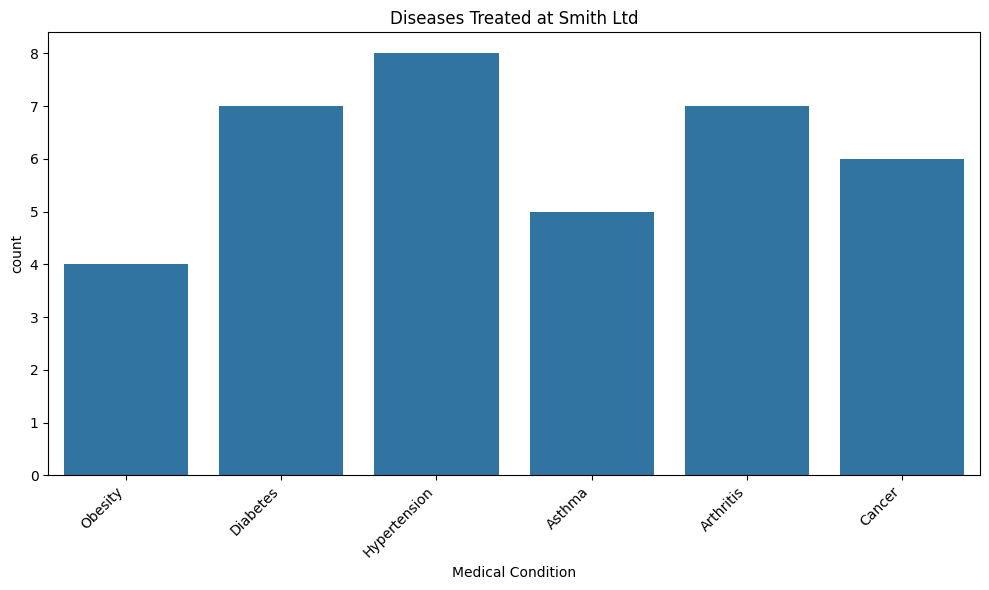

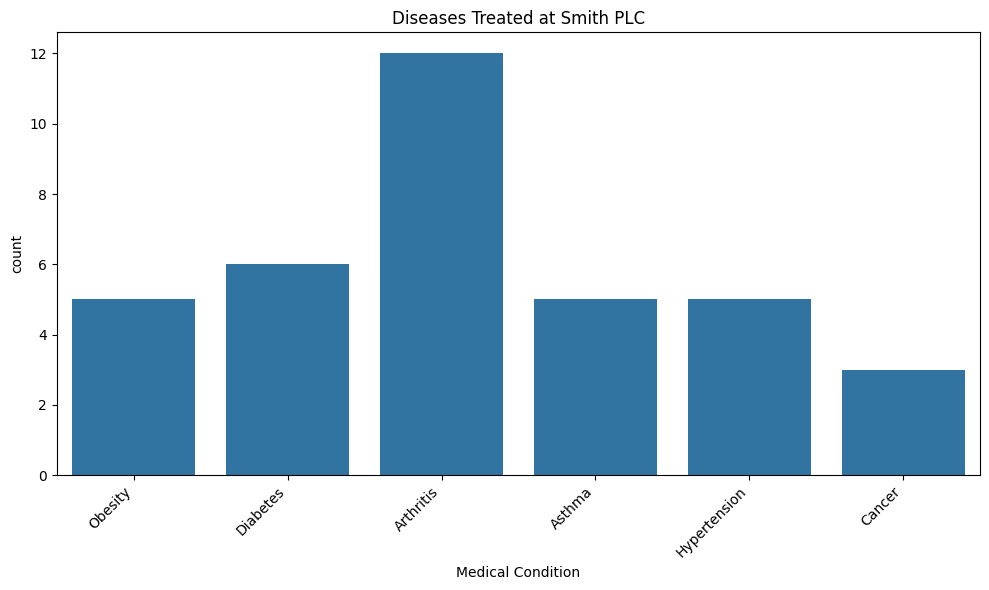

In [7]:
# prompt: Generate plots for the first 5 hospitals with highest frequencies against the diseases

hospital_counts = df['Hospital'].value_counts()
top_5_hospitals = hospital_counts.nlargest(5).index

for hospital in top_5_hospitals:
    hospital_df = df[df['Hospital'] == hospital]
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Medical Condition', data=hospital_df)
    plt.title(f'Diseases Treated at {hospital}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [8]:
top_10_hospitals = hospital_counts.nlargest(10).index
avg_billing_top_10 = []

for hospital in top_10_hospitals:
    hospital_df = df[df['Hospital'] == hospital]
    avg_billing = hospital_df['Billing Amount'].mean()
    avg_billing_top_10.append(avg_billing)

print("Average Billing Amount for Top 10 Hospitals:")
for i in range(10):
    print(f"{top_10_hospitals[i]}: {avg_billing_top_10[i]}")


Average Billing Amount for Top 10 Hospitals:
LLC Smith: 23413.4061874534
Ltd Smith: 25727.32122326139
Johnson PLC: 28531.649814866356
Smith Ltd: 26217.185559616446
Smith PLC: 28595.123586564278
Smith Group: 22406.4247425864
Johnson Inc: 26889.070560832264
Smith Inc: 22895.06992835752
Smith LLC: 22865.113939391023
Group Smith: 28217.993358102307


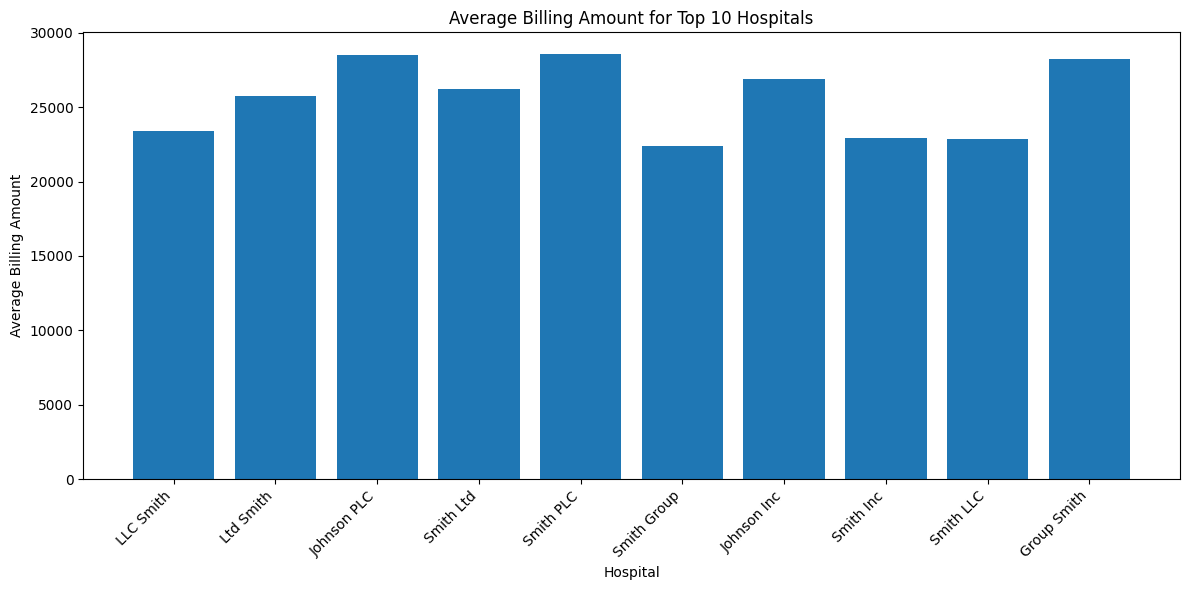

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_hospitals, avg_billing_top_10)
plt.xlabel('Hospital')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing Amount for Top 10 Hospitals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()


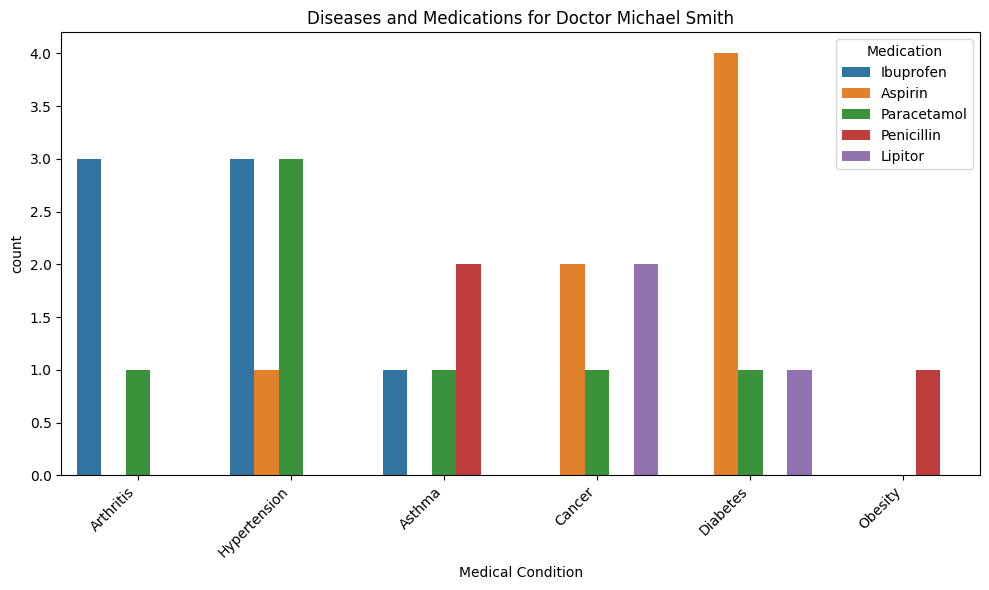

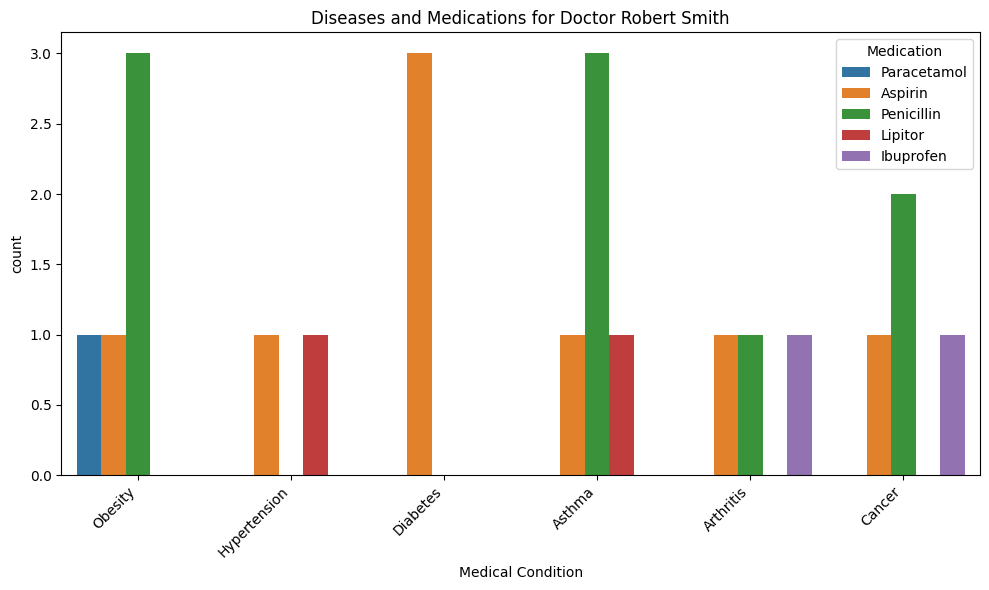

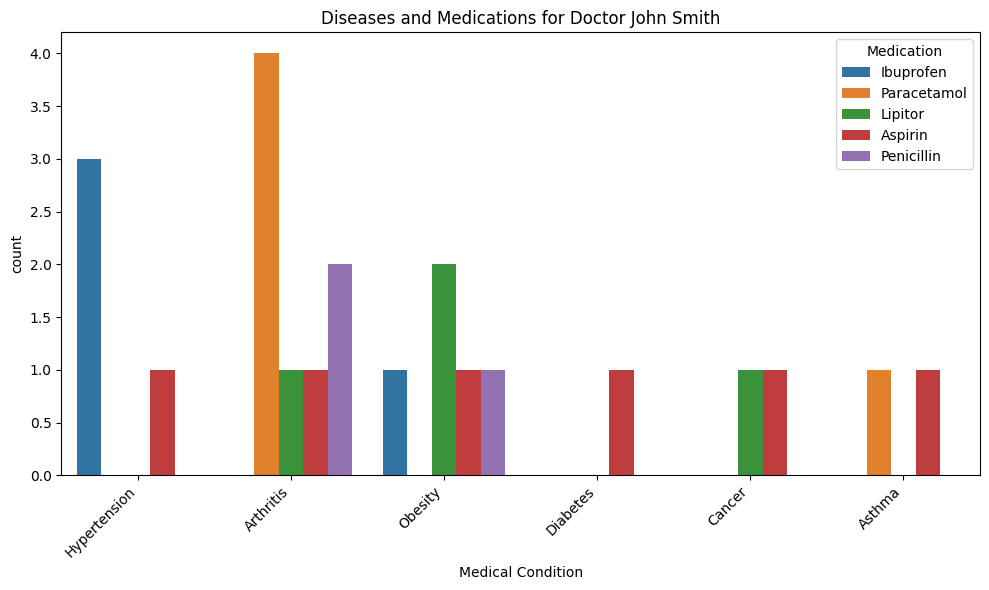

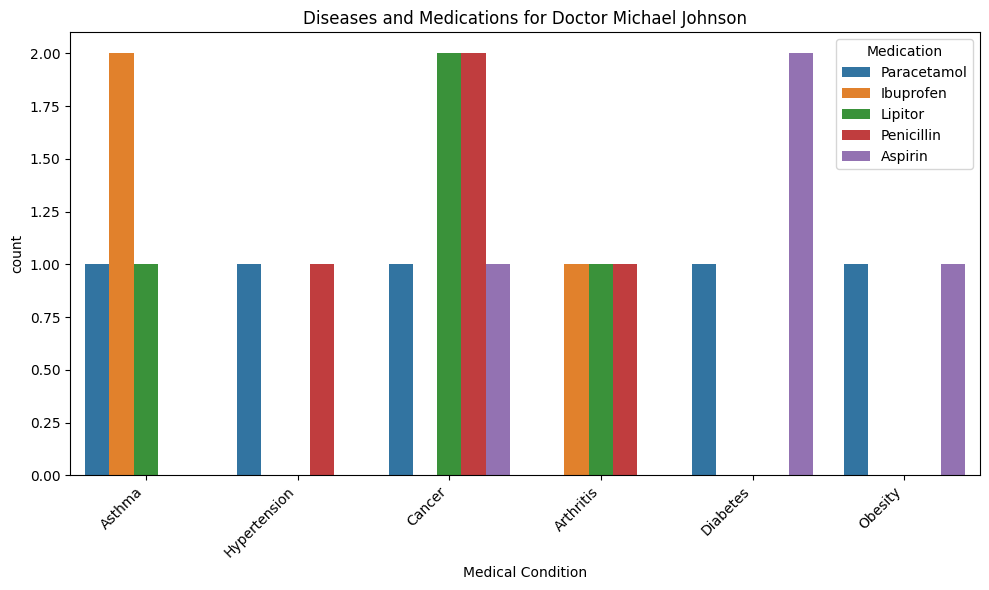

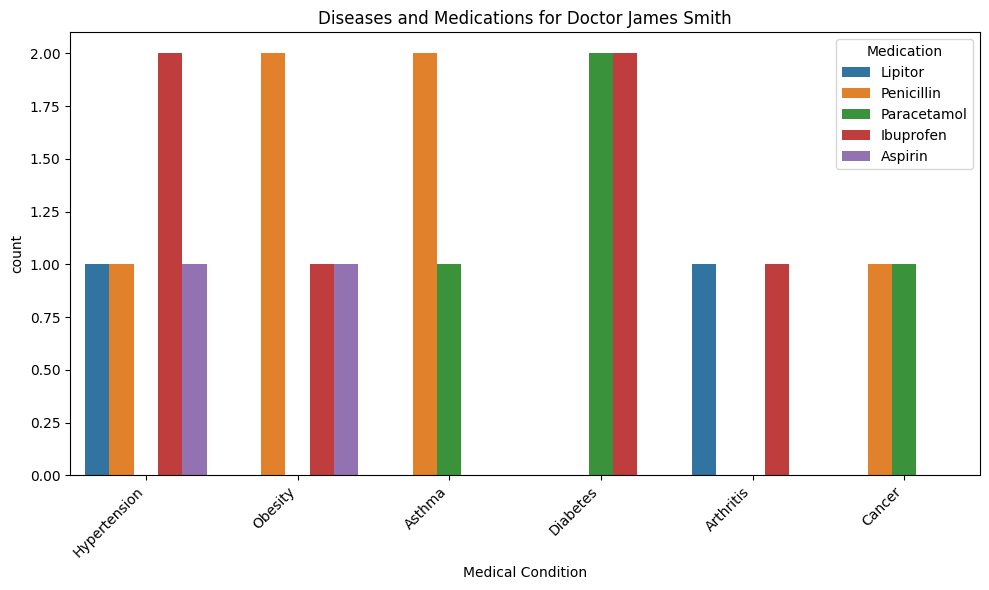

In [4]:
doc_counts = df['Doctor'].value_counts()
top_5_doctors = doc_counts.nlargest(5).index

for doctor in top_5_doctors:
    doctor_df = df[df['Doctor'] == doctor]
    plt.figure(figsize=(10, 6))


    # Plot Medical Condition vs. Medication
    sns.countplot(x='Medical Condition', hue='Medication', data=doctor_df)
    plt.title(f'Diseases and Medications for Doctor {doctor}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


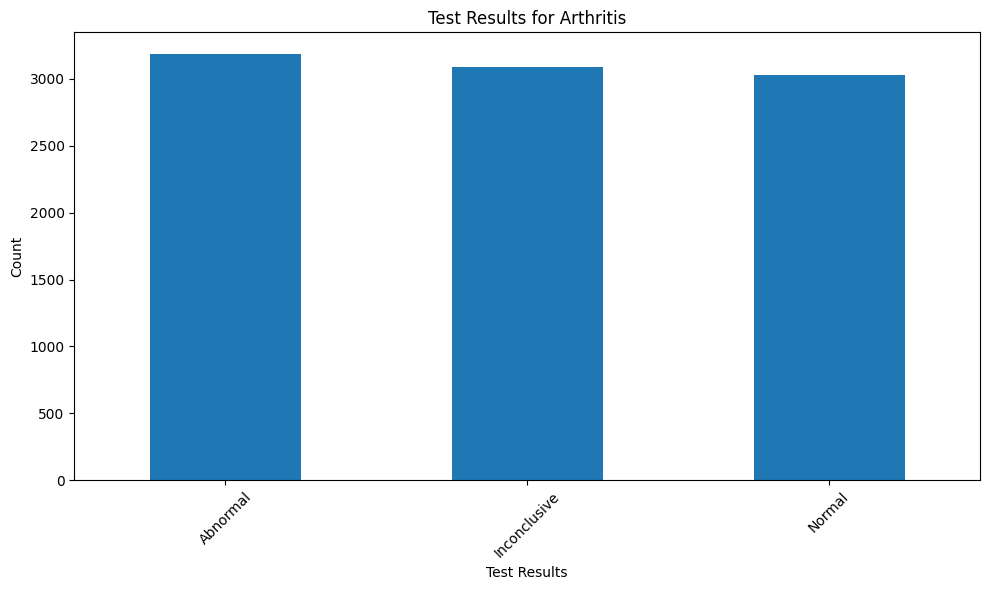

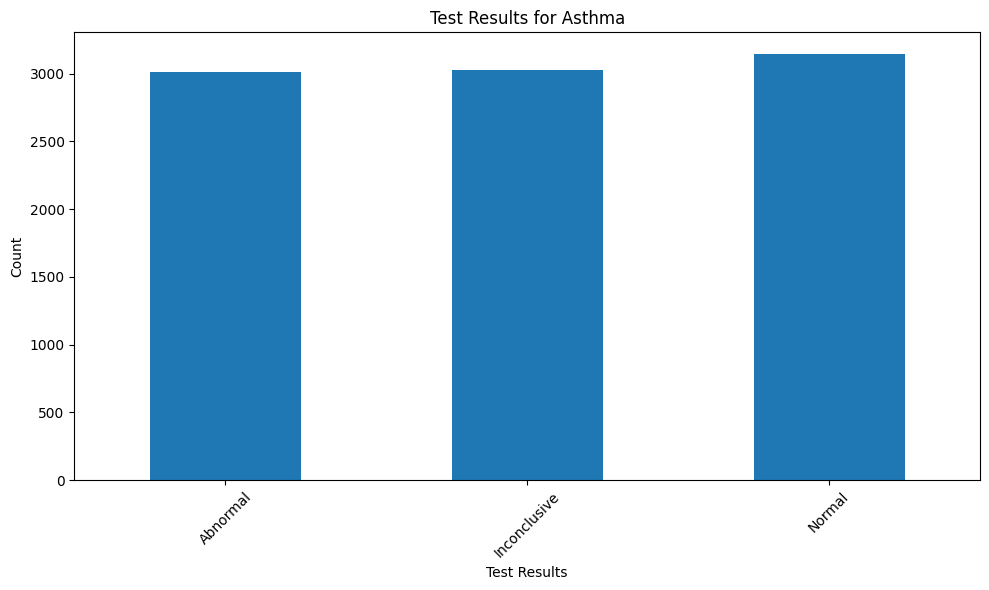

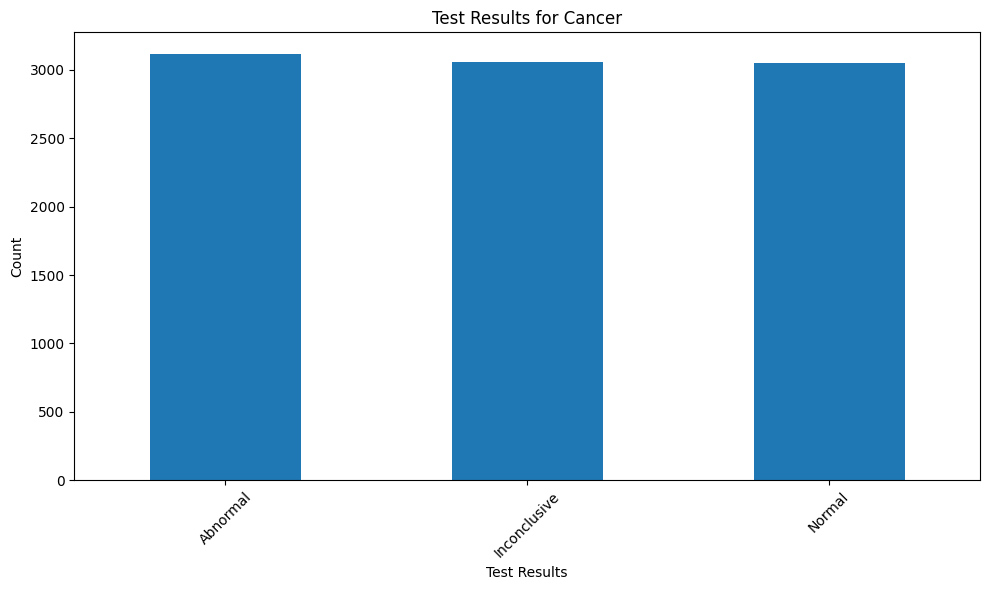

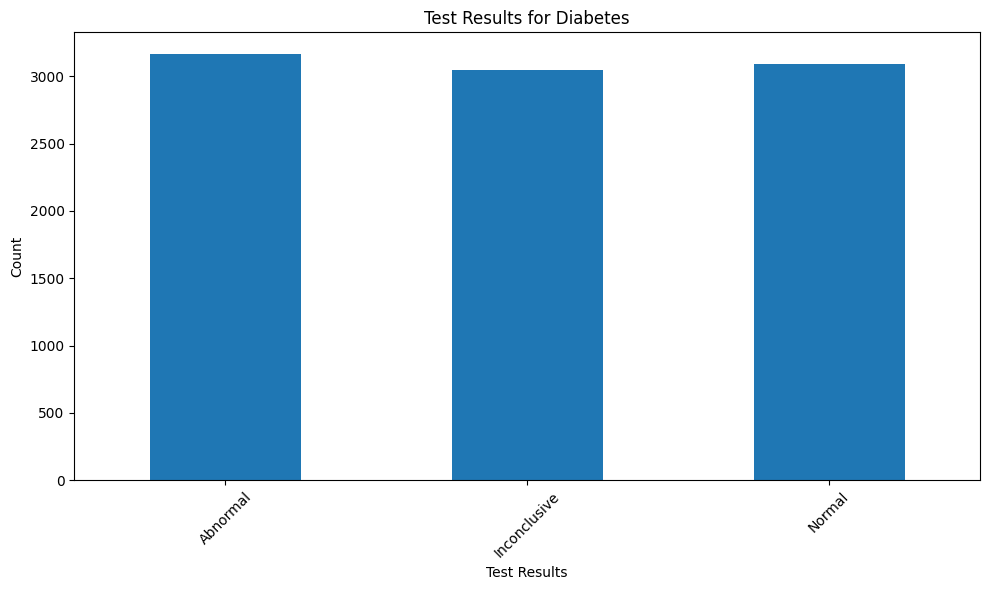

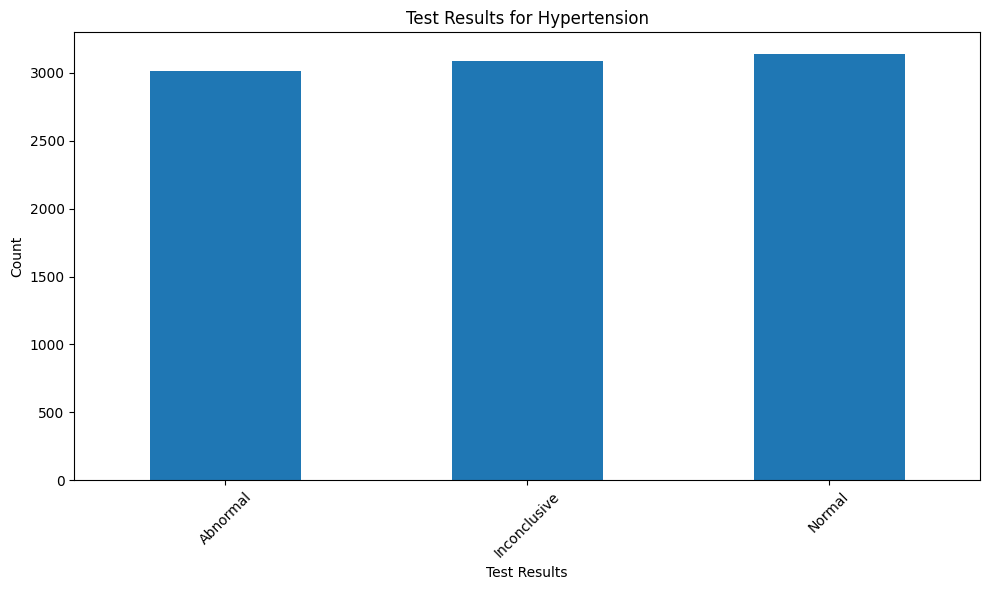

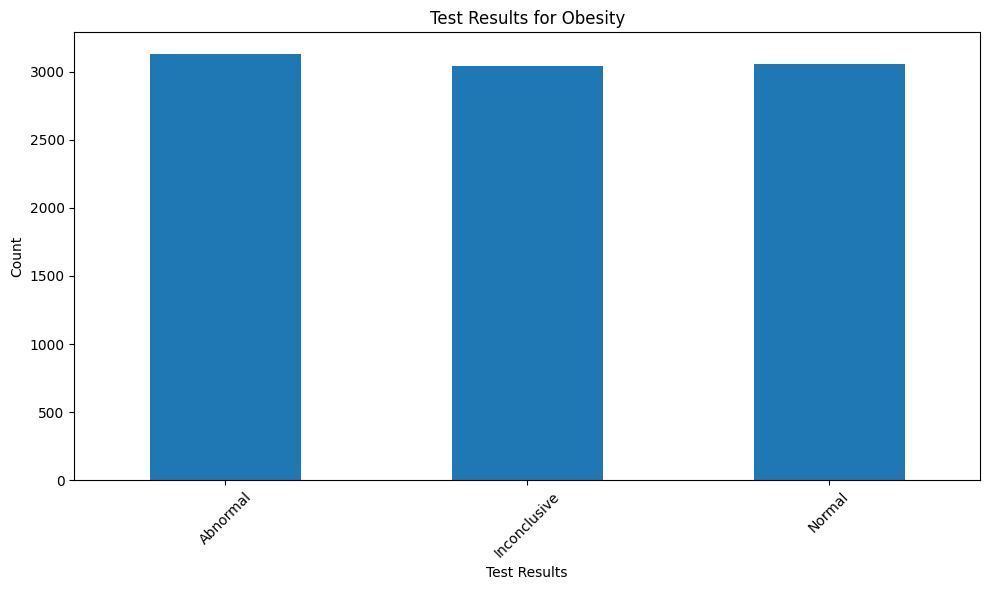

In [11]:
if 'Test Results' not in df.columns or 'Medical Condition' not in df.columns:
    print("Error: 'Test Results' or 'Medical Condition' column not found in the DataFrame.")
else:
    # Group data by disease and test results for plotting
    disease_test_counts = df.groupby(['Medical Condition', 'Test Results']).size().unstack(fill_value=0)

    # Plot each disease against test results
    for disease in disease_test_counts.index:
        plt.figure(figsize=(10, 6))
        disease_test_counts.loc[disease].plot(kind='bar')
        plt.title(f'Test Results for {disease}')
        plt.xlabel('Test Results')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
